In [1]:
#資料檔路徑(資料檔：i_filepath，完成檔：o_filepath，內文說明檔：c_filepath)
filepath = '/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch09/'
i_filepath = filepath 
o_filepath = filepath + '完成檔/'
c_filepath = filepath + '內文說明檔/'

# 9-1 機器學習前準備─以Iris為例

#1. 資料取得

In [2]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv(i_filepath + 'Iris.csv')
df=df.drop('Id', axis=1)
df.head()

Mounted at /content/MyGoogleDrive


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#2. 資料處理


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df = df.drop_duplicates() #刪除重複列
df.reset_index(drop=True) #將列索引重新編號
s = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }
df['Species']=df['Species'].map(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


#3. 探索性資料分析


In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#4. 機器學習做資料分析

# 9-2 機器學習實作──以Iris為例

# 9-2-1 提出具體的假設

# 9-2-2 找出機器學習模型

# 挑選模型：匯入 KNN 模型

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# 學習訓練：建立並訓練 KNN 模型

In [7]:
df_X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_y = df['Species']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)

In [9]:
k = 1
knn=KNeighborsClassifier(n_neighbors=k)  #建立新模型 knn

In [10]:
knn.fit(X_train, y_train)  # 用 training data 去訓練模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 測試評估

In [11]:
print('----KNN模式訓練後，取test data 進行分類的正確率計算-------')
print('準確率:',knn.score(X_test,y_test))

----KNN模式訓練後，取test data 進行分類的正確率計算-------
準確率: 0.9333333333333333


In [12]:
s = []
for i in range(3,11):
  k=i
  knn=KNeighborsClassifier(n_neighbors=k)  
  knn.fit(X_train, y_train)  # 用 training data 去訓練模型
  print('k =',k,' 準確率:',knn.score(X_test,y_test)) #用 test data 檢測模型的準確率
  s.append(knn.score(X_test,y_test))

k = 3  準確率: 0.9666666666666667
k = 4  準確率: 0.9666666666666667
k = 5  準確率: 0.9666666666666667
k = 6  準確率: 0.9666666666666667
k = 7  準確率: 1.0
k = 8  準確率: 1.0
k = 9  準確率: 1.0
k = 10  準確率: 1.0


In [13]:
  k = 8
  knn=KNeighborsClassifier(n_neighbors=k)  
  knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

# 加廣知識：視覺化圖表來顯示準確率

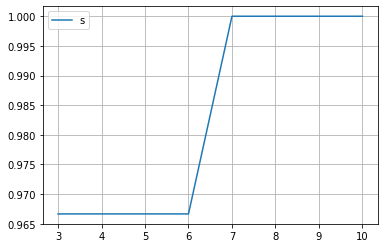

In [14]:
df_knn = pd.DataFrame()
df_knn['s'] = s
df_knn.index = [3,4,5,6,7,8,9,10]  
df_knn.plot(grid=True)

In [15]:
print('分類的預測結果：')
pred = knn.predict(X_test) #產生Test data預測結果
pred 

分類的預測結果：


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [16]:
y_test.values #觀察Test data真實數據

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

# 加廣知識：利用values屬性做橫式顯示

In [17]:
y_test

38         Iris-setosa
75     Iris-versicolor
114     Iris-virginica
13         Iris-setosa
27         Iris-setosa
46         Iris-setosa
125     Iris-virginica
49         Iris-setosa
124     Iris-virginica
103     Iris-virginica
11         Iris-setosa
117     Iris-virginica
45         Iris-setosa
48         Iris-setosa
134     Iris-virginica
119     Iris-virginica
18         Iris-setosa
129     Iris-virginica
88     Iris-versicolor
92     Iris-versicolor
139     Iris-virginica
148     Iris-virginica
79     Iris-versicolor
147     Iris-virginica
136     Iris-virginica
76     Iris-versicolor
62     Iris-versicolor
21         Iris-setosa
51     Iris-versicolor
66     Iris-versicolor
Name: Species, dtype: object

In [18]:
y_test.values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]])

# 加深知識：交叉驗證概念

In [21]:
from sklearn.model_selection import cross_val_score
s = cross_val_score(knn, df_X, df_y, scoring='accuracy', cv=10)
print('交叉驗證每次的準確率：',s)
print('交叉驗證得到的平均準確率：',s.mean())

交叉驗證每次的準確率： [1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]
交叉驗證得到的平均準確率： 0.9666666666666668


# 決定模型

# 進行分類預測

In [22]:
new = [[6.6,3.1,5.2,2.4]]
v=knn.predict(new)
if v==0:
  s='Iris-Setosa'
elif v==1:
  s='Iris-Versicolour'
elif v==2:
  s='Iris-Virginica'
else:
  s='錯誤'
print('預測結果為：', s)    

預測結果為： 錯誤


# 9-3 機器學習前準備─以Titanic為例

#1. 資料取得

In [23]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv(i_filepath + 'train.csv')
df.head()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2. 資料處理

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df['Age']=df['Age'].fillna(df['Age'].mean()) 
df['Embarked']=df['Embarked'].fillna('S') 
df=df.drop('Cabin', axis=1) 
print('重複值：', df[df.duplicated()]) #檢查有無重複值
df['Sex']=df['Sex'].map({'female':0, 'male':1}) 
df['Embarked']=df['Embarked'].map({'S':0, 'C':1, 'Q':2}) 
df.head()

重複值： Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


# 3. 探索性資料分析

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


# 4. 機器學習做資料分析

# 9-4 機器學習實作─以Titanic為例

# 9-4-1 提出具體的假設

# 9-4-2 找出機器學習模型

# 挑選模型：匯入 KNN 模型

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# 學習訓練：建立並訓練 KNN 模型

In [28]:
df_X = df[['Sex','Pclass']]
df_y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)

In [30]:
k = 1
knn=KNeighborsClassifier(n_neighbors=k)  

In [31]:
knn.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 測試評估

In [32]:
print('----KNN模式訓練後，取test data 進行分類的準確率計算-------')
print('準確率:',knn.score(X_test,y_test))

----KNN模式訓練後，取test data 進行分類的準確率計算-------
準確率: 0.7374301675977654


In [33]:
s = []
for i in range(3,11):
  k=i
  knn=KNeighborsClassifier(n_neighbors=k)  
  knn.fit(X_train, y_train)  # 用 training data 去訓練模型
  print('k =',k,' 準確率:',knn.score(X_test,y_test))  #用 test data 檢測模型的準確率
  s.append(knn.score(X_test,y_test))

k = 3  準確率: 0.7374301675977654
k = 4  準確率: 0.7541899441340782
k = 5  準確率: 0.7374301675977654
k = 6  準確率: 0.7374301675977654
k = 7  準確率: 0.7374301675977654
k = 8  準確率: 0.7541899441340782
k = 9  準確率: 0.7541899441340782
k = 10  準確率: 0.7541899441340782


In [34]:
k = 4
knn=KNeighborsClassifier(n_neighbors=k)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [35]:
print('分類的預測結果：')
pred = knn.predict(X_test) 
print(pred) #觀察預測結果
print('真實數據：')
print(y_test.values)  #觀察真實數據(Test data)

分類的預測結果：
[1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1]
真實數據：
[1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7541899441340782

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[88, 17],
       [27, 47]])

In [38]:
from sklearn.model_selection import cross_val_score
s=cross_val_score(knn, df_X, df_y, scoring='accuracy', cv=10)
print('準確率：',s)
print('平均準確率：',s.mean())
print('最高：',s.max())
print('最差：',s.min())

準確率： [0.74444444 0.79775281 0.76404494 0.83146067 0.82022472 0.79775281
 0.80898876 0.75280899 0.82022472 0.76404494]
平均準確率： 0.7901747815230962
最高： 0.8314606741573034
最差： 0.7444444444444445


# 決定模型

# 進行分類預測

In [39]:
print('-----------(1)電影中兩位主角的生還推測-------------')
Rose=[[0,1]] #女性 頭等艙 蘿絲（Rose DeWitt Bukater）
Jack=[[1,3]] #男性 三等艙 傑克（Jack Dawson）
v=knn.predict(Rose)
if v==1:
  s='生還'
else:
  s='死亡'
print('Rose能生還嗎 ? ', s)           #Rose為女性,及坐頭等艙

v=knn.predict(Jack)
if v==1:
  s='生還'
else:
  s='死亡'
print('Jack能生還嗎 ? ', s)           #Jack為男性,及坐三等艙

-----------(1)電影中兩位主角的生還推測-------------
Rose能生還嗎 ?  生還
Jack能生還嗎 ?  死亡


In [40]:
# 真實的伊西多和伊達·斯特勞斯（Isidor and Ida Straus）夫婦 (You stay, I stay)
# http://www.epochtimes.com/b5/17/12/6/n9931745.htm
# Isidor 美國梅西百貨創辦人之一 
#
print('-----(2)真實的伊西多和伊達·斯特勞斯夫婦的生還推測-------')
Mrs=[[0,1]]    #女性 頭等艙 Straus, Mrs. Isidor (Rosalie Ida Blun)
Mr=[[1,1]] #男性 頭等艙 Straus, Mr. Isidor
v=knn.predict(Mrs)
if v==1:
  s='生還'
else:
  s='死亡'
print('Mrs. Straus能生還嗎 ? ', s)      #Ida為女性,及坐頭等艙，可優先搭乘救生艇存活
v=knn.predict(Mr)                  #Isidor的生存率有多高呢？
if v==1:
  s='生還'
else:
  s='死亡'
print('Mr. Straus能生還嗎 ? ', s) 

-----(2)真實的伊西多和伊達·斯特勞斯夫婦的生還推測-------
Mrs. Straus能生還嗎 ?  生還
Mr. Straus能生還嗎 ?  死亡


In [41]:
# 真實的 Mrs. Brown
# https://hokkfabrica.com/her-story-margaret-brown-from-titanic/
#
print('-----------(3)真實的Mrs. Brown的生還推測-------------')
#女性 頭等艙 Brown, Mrs. James Joseph (Margaret Tobin) 故事中的暴發戶 對Jack很友善
Brown=[[0,1]]    
v=knn.predict(Brown)                     #Mrs. Brown呢？
if v==1:
  s='生還'
else:
  s='死亡'
print('Mrs. Brown能生還嗎 ? ', s)

-----------(3)真實的Mrs. Brown的生還推測-------------
Mrs. Brown能生還嗎 ?  生還


In [42]:
print('-------------- (5)若你也搭上了鐵達尼號呢？ ----------------')
s=input('您的性別（0：女，1：男），請輸入代碼？ ')
c=input('搭乘的船艙艙等（1：S艙，2：C艙，3：Q艙），請輸入代碼？ ')
you=[[int(s),int(c)]]
v=knn.predict(you)
if v==1:
  print('預測為:幸運生還')
else:
  print('預測為:無法生還')

-------------- (5)若你也搭上了鐵達尼號呢？ ----------------
您的性別（0：女，1：男），請輸入代碼？ 1
搭乘的船艙艙等（1：S艙，2：C艙，3：Q艙），請輸入代碼？ 3
預測為:無法生還
